In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import scienceplots
%matplotlib inline
from typing import Union, Tuple, List, Dict

import sys
sys.path.append("../../../src")

import nanonets_utils

data_folder = "/home/j/j_mens07/phd/data/1_funding_period/potential/system_size/"

In [2]:
# Parameter
N_min   = 3
N_max   = 8
N_keys  = N_max-N_min+1
N_vals  = [i for i in range(N_min,N_max+1)]
N_e     = 8

data        = nanonets_utils.load_boolean_results(folder=data_folder, N=N_vals, N_e=N_e, input_cols=['E1','E3'])
fitness     = {N : nanonets_utils.fitness(df=data[N], input_cols=['E1','E3']) for N in N_vals}
abundance   = {N : nanonets_utils.abundance(df=fitness[N]) for N in N_vals}

In [13]:
data[3]

,E0,E1,E2,E3,E4,E5,E6,E7,G,Eq_Jumps,Jumps,Current,Error
0,-0.099933,0.00,0.007049,0.00,0.097523,-0.006444,0.047368,0.0,0.0,100000.0,50000.0,0.018266,0.000296
1,-0.099933,0.00,0.007049,0.01,0.097523,-0.006444,0.047368,0.0,0.0,100000.0,50000.0,0.018430,0.000257
2,-0.099933,0.01,0.007049,0.00,0.097523,-0.006444,0.047368,0.0,0.0,100000.0,50000.0,0.019248,0.000444
3,-0.099933,0.01,0.007049,0.01,0.097523,-0.006444,0.047368,0.0,0.0,100000.0,50000.0,0.019591,0.000351
4,-0.099881,0.00,0.035775,0.00,0.073346,0.032628,0.030619,0.0,0.0,100000.0,50000.0,0.023974,0.000192
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,0.099935,0.01,-0.045195,0.01,0.065140,-0.048119,0.061263,0.0,0.0,100000.0,50000.0,0.012018,0.000574
19996,0.099942,0.00,-0.098051,0.00,0.023729,0.014844,-0.017651,0.0,0.0,100000.0,275000.0,-0.005325,0.000265
19997,0.099942,0.00,-0.098051,0.01,0.023729,0.014844,-0.017651,0.0,0.0,100000.0,220000.0,-0.004601,0.000225
19998,0.099942,0.01,-0.098051,0.00,0.023729,0.014844,-0.017651,0.0,0.0,100000.0,245000.0,-0.004843,0.000239


In [18]:
def abundance_multiplot(data: Dict, gates: List[str] = ['AND', 'OR', 'XOR', 'XNOR', 'NAND', 'NOR'], 
    dpi: int = 200, x_limits: List[float] = [0.45, 10], y_limits: List[float] = [0.1, 100], 
    xlabel: str = 'Fitness', ylabel: str = 'Abundance', n_rows=2, n_cols=3, colormap='coolwarm') -> Tuple[plt.Figure, plt.Axes]:

    marker  = ['o','s','^','<','>','v','P']
    cmap    = plt.get_cmap(colormap)
    N_gates = len(gates)

    with plt.style.context(["science","bright","grid"]):
        
        fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, dpi=dpi, layout='constrained')
        fig.set_figwidth(fig.get_figwidth()*1.5)
        fig.set_figheight(fig.get_figheight()*1)

        for i, gate in enumerate(gates):
            ax      = axes.flat[i]
            keys    = []
            for j, (key, df) in enumerate(data.items()):
                ax.plot(df[f'{gate} Fitness'], df[f'{gate} Fitness Abundance'], marker=marker[j % len(marker)],
                        markevery=0.1, color=cmap((j+1)/N_gates))
                keys.append(key)
            ax.set_xlim(x_limits[0], x_limits[1])
            ax.set_ylim(y_limits[0], y_limits[1])
            ax.set_xscale('log')
            ax.set_yscale('log')
            
            if i >= (n_rows-1)*n_cols:
                ax.set_xlabel(xlabel)
            else:
                ax.set_xticklabels("")

            if i % n_cols == 0:
                ax.set_ylabel(ylabel)
            else:
                ax.set_yticklabels("")

            ax.set_title(gate)

        norm    = mpl.colors.Normalize(vmin=np.min(keys)**2, vmax=np.max(keys)**2)
        cbar    = mpl.cm.ScalarMappable(norm=norm, cmap=colormap)
        fig.colorbar(cbar, ax=axes.ravel(), label='$N_{NP}$')

    return fig, ax

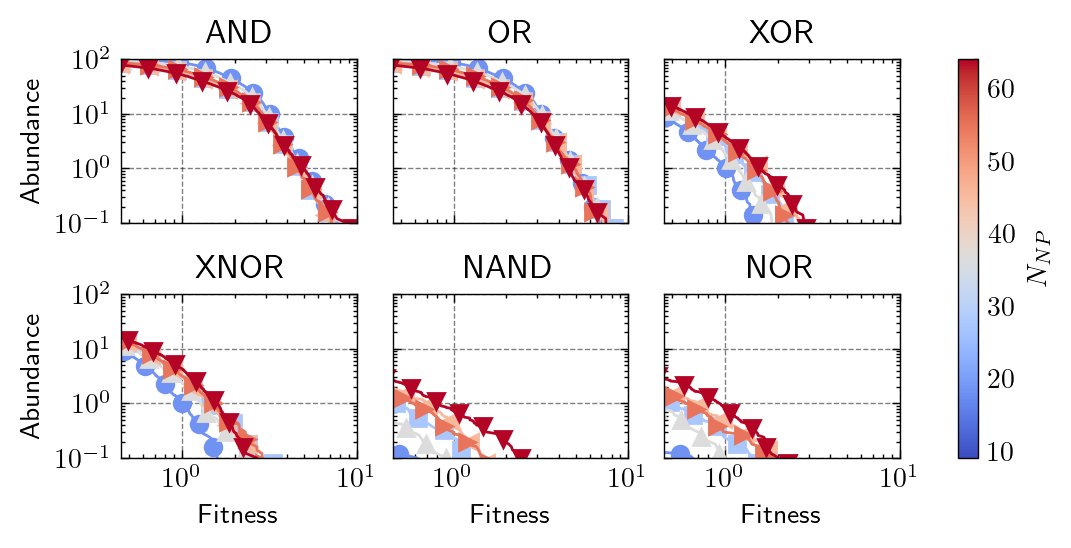

In [19]:
fig, ax = abundance_multiplot(abundance)

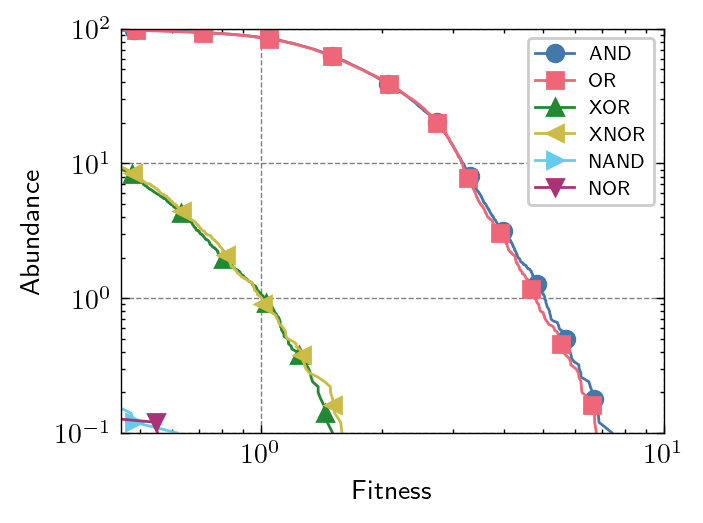

In [5]:
fig, ax = nanonets_utils.abundance_plot(abundance[3])

---

In [ ]:
data[4]

In [3]:
# Parameter
N_min   = 3
N_max   = 16
N_keys  = N_max-N_min+1
N_vals  = [i for i in range(N_min,N_max+1)]
N_e     = 8

# Boolean On and Off
off_states  = np.array(N_keys*[0.0])
# on_states   = np.round((np.array([0.69, 0.77, 0.84, 0.92, 1. , 1.08, 1.16, 1.23, 1.31, 1.39, 1.47, 1.55, 1.62, 1.70, 1.78, 1.86])*0.01),4)
on_states   = np.round((np.array([0.75, 0.82, 0.89, 0.96, 1. , 1.06, 1.11, 1.17, 1.22, 1.28, 1.33, 1.41, 1.50, 1.62, 1.85, 2.13])*0.01),4)

# Current Conditions
min_error   = 0.0
max_error   = 0.5
min_current = 0.0

data, data_nc = nanonets_utils.get_boolean_data(data_folder, N=N_vals, N_e=N_e, off_state=off_states, on_state=on_states,
                                                min_currents=min_current, min_error=min_error, max_error=max_error)

In [ ]:
p_deleted = np.array([len(data_nc[N])/(len(data[N])+len(data_nc[N])) for N in N_vals])

with plt.style.context(["science","bright"]):

    fig = plt.figure(dpi=200)
    ax  = fig.add_subplot()

    ax.stem(np.array(N_vals)**2, p_deleted*100, basefmt='')

    ax.set_xlabel("$N_{NP}$")

## Fitness Abundance

In [10]:
gates       = ['AND','OR','XOR','NAND','NOR','XNOR']
delta       = 0.0
bins        = 0
fitness     = {N : nanonets_utils.fitness(df=data[N], N_controls=(N_e-3), delta=delta, off_state=off_states[i], on_state=on_states[i], gates=gates) for i, N in enumerate(N_vals)}
abundance   = {N : nanonets_utils.abundance(df=fitness[N], bins=bins) for N in N_vals}

In [ ]:
cmap_c  = 'inferno'
cmap    = plt.get_cmap(cmap_c)
nrows   = 2
ncols   = 3

with plt.style.context(["science","bright"]):

    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, dpi=200, layout='constrained')
    fig.set_figwidth(fig.get_figwidth()*1.4)

    for i, gate in enumerate(gates):

        ax  = axes.flat[i]

        for j, N in enumerate(N_vals):

            df  = abundance[N]
            ax.plot(df[f'{gate} Fitness'], df[f'{gate} Fitness Abundance'], c=cmap((j+1)/N_keys))
        
        ax.set_xlim(0.5,100)
        ax.set_ylim(0.1,100)
        ax.set_xscale('log')
        ax.set_yscale('log')
        ax.set_title(gate, fontsize='small')
        
        if i % ncols == 0:
            ax.set_ylabel('Abundance [\%]')
        else:
            ax.set_yticklabels("")
        
        if i >= (nrows-1)*ncols:
            ax.set_xlabel('$F$')
        else:
            ax.set_xticklabels("")
    
    norm    = mpl.colors.Normalize(vmin=N_min**2, vmax=N_max**2)
    cbar    = mpl.cm.ScalarMappable(norm=norm, cmap=cmap_c)
    fig.colorbar(cbar, ax=axes.ravel(), label='$N_{NP}$')

---

## Nonlinear Parameter

In [12]:
# Current Relations
params  = {N : nanonets_utils.nonlinear_parameter(data[N], off_state=off_states[i], on_state=on_states[i]) for i, N in enumerate(N_vals)}

# NDR
Q_ndr_l = np.array([nanonets_utils.return_ndr(params[N]['Ml']) for N in N_vals])
Q_ndr_r = np.array([nanonets_utils.return_ndr(params[N]['Mr']) for N in N_vals])
Q_ndr   = (Q_ndr_l + Q_ndr_r) / 2

# NLS
bins    = 500
Q_nls   = np.array([nanonets_utils.return_nls(df=params[N], bins=bins) for N in N_vals])

In [ ]:
with plt.style.context(["science","bright","grid"]):

    fig = plt.figure(dpi=200)
    ax  = fig.add_subplot()
    
    ax.plot(np.array(N_vals)**2, Q_ndr, '-o', label='NDR')
    ax.plot(np.array(N_vals)**2, Q_nls, '-s', label='NLS')

    ax.set_xlabel('$N_{NP}$')
    ax.set_ylabel('$Q$')
    ax.legend(loc='upper right')
    ax.set_xlim(0,270)

---